# Problems
This notebook will be used to complete the problems for semester 4 for Applied Statistics

#### Importing required libraries

In [132]:
# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html
import math

# Permutations and combinations.
# https://docs.python.org/3/library/itertools.html
import itertools

# Random selections.
# https://docs.python.org/3/library/random.html
import random

# Numerical structures and operations.
# https://numpy.org/doc/stable/reference/index.html#reference
import numpy as np

# Plotting.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

## Problem 1: Extending the Lady Tasting Tea

Let's extend the Lady Tasting Tea experiment as follows. The original experiment has 8 cups: 4 tea-first and 4 milk-first. Suppose we prepare 12 cups: 8 tea-first and 4 milk-first. A participant claims they can tell which was poured first.

Simulate this experiment using numpy by randomly shuffling the cups many times and calculating the probability of the participant correctly identifying all cups by chance. Compare your result with the original 8-cup experiment.

In your notebook, explain your simulation process clearly, report and interpret the estimated probability, and discuss whether, based on this probability, you would consider extending or relaxing the p-value threshold compared to the original design.

### The background of the Lady Tasting Tea experiment

The lady tasting tea experiment was created by Ronald Fisher and is recorded in his book "The Design of Experiments" in 1935. 

The experiment demonstrates: 
- the idea of a "null hypothesis"
- calculating probabilities of outcomes (leading to the concept of p-values)
- how randomisation protects against bias

https://en.wikipedia.org/wiki/Lady_tasting_tea
https://www.reddit.com/r/wikipedia/comments/1f76y13/the_lady_tasting_tea_experiment_was_a_famous/
https://en.wikipedia.org/wiki/Null_hypothesis
https://www.investopedia.com/terms/p/p-value.asp




### Assignment Intro

The purpose of the simulation in past 1 of this notebook is to take the lady tasting tea experiment and extend the scope to estimate the probabilty that a participant could identify all 12 cups correctly by chance.

Our experiment will have the following breakdown: 
- 12 cups of tea total
- 8 cups tea first
- 4 cups milk first

The null hypothesis (H₀) for this experiment is that the participant has no real ability to determine the difference. Each “guess” is simply a random permutation of the 12 cups.

In [133]:
# Number of cups of tea in total.
no_cups = 12

# Number of cups of tea with milk in first.
no_cups_milk_first = 4

# Number of cups of tea with tea in first.
no_cups_tea_first = 8

In [134]:
# Number of ways of selecting four cups from eight.
ways = math.comb(no_cups, no_cups_milk_first)

# Show.
ways

495

#### Choosing the number of cups to use as placeholders

Before simulating the experiment, the number of placeholders to use to represent the cups in the maths.

In the orginal experiment there were an even number of milk first vs tea first cups. 

In the extended design we have:

- 12 cups in total
- 8 tea-first
- 4 milk-first

When we count the number of possible arrangements, we can either:

- choose which 4 cups are milk-first  
*or*
- choose which 8 cups are tea-first

In [135]:
# Choosing what number of cups we need to use as placeholders

# Option 1: Using 4 cups as placeholders for milk-first cups

# Number of cups of tea in total.
n = 12
# Number of cups of tea with milk in first.
k_milk = 4
# Number of cups of tea with tea in first.
k_tea = 8

# Number of ways to choose the 4 milk-first cups from 12 total cups (12 choose 4)
choose_4 = math.factorial(n) // (math.factorial(k_milk) * math.factorial(n - k_milk))

# Number of ways to choose the 8 tea-first cups from 12 total cups (12 choose 8)
choose_8 = math.factorial(n) // (math.factorial(k_tea) * math.factorial(n - k_tea))

print(f'Milk first: {choose_4} \nTea first:  {choose_8}')


Milk first: 495 
Tea first:  495


Above we can see that 12 chose 4 and 12 chose 8 are the same, both resulting in a binomial coefficient of 495.

$\binom{12}{4} = \binom{12}{8}$

Since both counts are the same, we will use k = 4 (number of milk first cups) as the subset the particapnt must correctly identify in our probablity calculations.

#### Calculating the number of possible combinations

Now that the number of placeholders are chosen, we can determine how many different ways the participant can select the correct set of milk first cups purely by chance. This serves as a clear illustration of what the explanation math.factorial function is doing in the background.

For the extended experiment, this means determining how many unique stes of 4 cups can be chosen from the 12 cups available.

In [136]:
# Total number of ways of selecting four cups from twelve, keeping them in order
ways_ordered = 12 * 11 * 10 * 9
print (f'Ordered selections: \t\t\t{ways_ordered}')

# No of ways of shuffling four cups
no_shuffles = 4 * 3 * 2 * 1
print (f'Permutations of the same 4 cups (4!): \t{no_shuffles}')

# Dividing to remove duplicates and leaves only unique combinations
no_combs = ways_ordered // no_shuffles
print(f'Unique combinations (12 choose 4): \t{no_combs}')

Ordered selections: 			11880
Permutations of the same 4 cups (4!): 	24
Unique combinations (12 choose 4): 	495


Now that the number of unique sets of four has been shown step by step, next we will use the math.factorial function to compute "12 chose 4", which should  have the same end result.

In [137]:
# Functions

# Creating a function to calculate n choose k
def n_choose_k(n, k):
    """Returns the number of unique combinations of choosing k items from n."""
    mf_no_combs = math.factorial(n) // (math.factorial(k) * math.factorial(n - k))
    return print(f'Unique combinations ({n} choose {k}): {mf_no_combs}')

def setup_cups(no_cups, no_cups_milk_first):
    """ Prepares the labels, all possible combinations, 
    and a randomly selected set of correct milk first cups"""
    # Ordering 
    # The cup labels.
    labels = list(range(no_cups))
    # Show the different ways of selecting no_cups_milk_first out of no_cups cups of tea.
    combs = list(itertools.combinations(labels, no_cups_milk_first))
    # Select four cups at random to put milk in first.
    # https://docs.python.org/3/library/random.html#random.sample
    labels_milk = random.sample(labels, no_cups_milk_first)
    # Sort, inplace.
    labels_milk.sort()
    return labels, combs, labels_milk


In [138]:
# Calling function to calculate unique combinations and passing 12 as the value for n and 4 as the value for k
mf_no_combs = n_choose_k(12, 4)

Unique combinations (12 choose 4): 495


In [139]:
# Calling function to setup cups and setting the returned tuple into three variables
labels, combs, labels_milk = setup_cups(12, 4)

In [140]:
# Calculate the overlap between each element of combs and labels_milk.
no_overlaps = []

# Loop through the combinations.
for comb in combs:
  # Turn comb into a set.
  s1 = set(comb)
  # Turn labels_milk into a set.
  # Uses: https://docs.python.org/3/tutorial/datastructures.html#sets
  s2 = set(labels_milk)
  # Figure out where they overlap.
  overlap = s1.intersection(s2)
  # Show the combination and the overlap.
  # print(comb, len(overlap), overlap)
  # Append overlap to no_overlaps.
  no_overlaps.append(len(overlap))

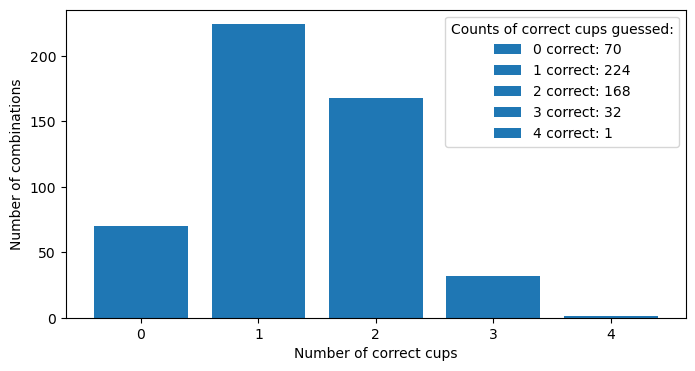

In [141]:
# Count the number of times each overlap occurs.
counts = np.unique(no_overlaps, return_counts=True)

# Creating a figure with the size 8x4 to allow for the legend to fit without overlapping
fig, ax = plt.subplots(figsize=(8, 4))
# Creating a bar chart
bars = ax.bar(counts[0], counts[1])

# https://docs.python.org/3/library/functions.html#zip
# Itterating through each bar to add a label for the legend counting the amount of correct cups and their frequency
for bar, value, freq in zip(bars, counts[0], counts[1]):
    bar.set_label(f"{value} correct: {freq}")

# Setting the labels and legend
ax.set_xlabel("Number of correct cups")
ax.set_ylabel("Number of combinations")
ax.legend(title="Counts of correct cups guessed:")


In [159]:
# The probability that participant (randomly) selects four correct cups
prob_all_four_extended = 1 / 495

# The probability that participant (randomly) selects three correct cups
prob_three_extended = 32/495

# The probability that participant (randomly) selects two correct cups
prob_two_extended = 168 / 495

# The probability that participant (randomly) selects one correct cups
prob_one_extended = 224 / 495

prob_zero_extended = 70 / 495

print(f'''
      --------------------------------------
      \t\tExtended Experiment
      --------------------------------------
      Probability of:
      \t - Four correct:\t{prob_all_four_extended:.4f}
      \t - Three correct:\t{prob_three_extended:.4f}
      \t - Two correct: \t{prob_two_extended:.4f}
      \t - One correct: \t{prob_one_extended:.4f}
      \t - Zero correct:\t{prob_zero_extended:.4f}
      --------------------------------------      
''')


      --------------------------------------
      		Extended Experiment
      --------------------------------------
      Probability of:
      	 - Four correct:	0.0020
      	 - Three correct:	0.0646
      	 - Two correct: 	0.3394
      	 - One correct: 	0.4525
      	 - Zero correct:	0.1414
      --------------------------------------      



In [143]:
# Number of ways to choose all 4 correct cups from the 4 true milk-first cups
choose_4_correct = math.comb(4, 4)

# Number of ways to choose 0 wrong cup from the 8 tea-first cups
choose_0_wrong = math.comb(8, 0)
#print(choose_3_correct, choose_1_wrong) # testing

distint_4_out_of_4 = choose_4_correct * choose_0_wrong
#print(f'{distint_4_out_of_4}')

# The probability that participant (randomly) selects four correct cups
distint_4_out_of_4/495

print(f'{distint_4_out_of_4/495:.4f}% probability of guessing all four correct')

0.0020% probability of guessing all four correct


Unique combinations (8 choose 4): 70


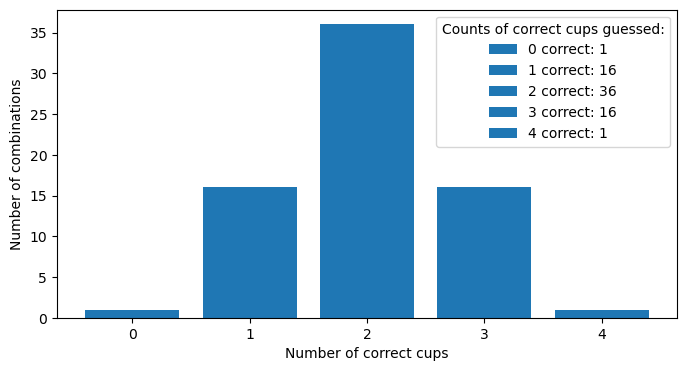

In [144]:
# Calling function to calculate unique combinations and passing 12 as the value for n and 4 as the value for k
mf_no_combs = n_choose_k(8, 4)
# Calling function to setup cups and setting the returned tuple into three variables
labels, combs, labels_milk = setup_cups(8, 4)
# Calculate the overlap between each element of combs and labels_milk.
no_overlaps = []

# Loop through the combinations.
for comb in combs:
  # Turn comb into a set.
  s1 = set(comb)
  # Turn labels_milk into a set.
  # Uses: https://docs.python.org/3/tutorial/datastructures.html#sets
  s2 = set(labels_milk)
  # Figure out where they overlap.
  overlap = s1.intersection(s2)
  # Show the combination and the overlap.
  # print(comb, len(overlap), overlap)
  # Append overlap to no_overlaps.
  no_overlaps.append(len(overlap))
# Count the number of times each overlap occurs.
counts = np.unique(no_overlaps, return_counts=True)

# Creating a figure with the size 8x4 to allow for the legend to fit without overlapping
fig, ax = plt.subplots(figsize=(8, 4))
# Creating a bar chart
bars = ax.bar(counts[0], counts[1])

# https://docs.python.org/3/library/functions.html#zip
# Itterating through each bar to add a label for the legend counting the amount of correct cups and their frequency
for bar, value, freq in zip(bars, counts[0], counts[1]):
    bar.set_label(f"{value} correct: {freq}")

# Setting the labels and legend
ax.set_xlabel("Number of correct cups")
ax.set_ylabel("Number of combinations")
ax.legend(title="Counts of correct cups guessed:")

In [162]:
# The probability that participant (randomly) selects four correct cups
prob_all_four_original = 1 / 70
prob_three_original = 16 / 70
prob_two_original = 36 / 70 
prob_one_original = 16 / 70
prob_zero_original = 1 / 70
print(f'''
      --------------------------------------
      \t\tOriginal Experiment
      --------------------------------------
      Probability of:
      \t - Four correct:\t{prob_all_four_original:.4f}
      \t - Three correct:\t{prob_three_original:.4f}
      \t - Two correct: \t{prob_two_original:.4f}
      \t - One correct: \t{prob_one_original:.4f}
      \t - Zero correct:\t{prob_zero_original:.4f}
      --------------------------------------
      ''')

print(f'{prob_all_four_original:.4f} probability of guessing all four correct in original experiment setup')

################### Test section to confirm calculations ###################
# Number of ways to choose all 4 correct cups from the 4 true milk-first cups
# choose_4_correct = math.comb(4, 4)

# Number of ways to choose 0 wrong cup from the 4 tea-first cups
# choose_0_wrong = math.comb(4, 0)
#print(choose_4_correct, choose_0_wrong) # testing

#distint_4_out_of_4 = choose_4_correct * choose_0_wrong
#print(f'{distint_4_out_of_4}')

# The probability that participant (randomly) selects four correct cups
#distint_4_out_of_4/70

#print(f'{distint_4_out_of_4/70:.4f}% probability of guessing all four correct')


      --------------------------------------
      		Original Experiment
      --------------------------------------
      Probability of:
      	 - Four correct:	0.0143
      	 - Three correct:	0.2286
      	 - Two correct: 	0.5143
      	 - One correct: 	0.2286
      	 - Zero correct:	0.0143
      --------------------------------------
      
0.0143 probability of guessing all four correct in original experiment setup


Comparing the probability of two experiements

In [146]:
print(f'''{prob_all_four_original:.4f} probability of guessing all four correct for original experiment
{prob_three_original:.4f} probability of guessing three correct for original experiment\n''')



print(f'''{prob_all_four_extended:.4f} probability of guessing all four correct for modified experiment
{prob_three_extended:.4f} probability of guessing three correct for modified experiment''')


0.0143 probability of guessing all four correct for original experiment
0.2286 probability of guessing three correct for original experiment

0.0020 probability of guessing all four correct for modified experiment
0.0646 probability of guessing three correct for modified experiment


The orginal lady tasting tea experiement reports the probability of participants correctly identifying all four milk first cups by randomly guessing is ~0.0143 (1.43%) which is below the p value threshold of 𝛼 = 0.05 (5%). 

This shows the outcome of a participant guessing all 4 cups correctly by chance is extremely rare and would go against the null hypothesis because if the participant was guessing the chances of obsering a aperfect result would be very unlikely.

https://en.wikipedia.org/wiki/The_Design_of_Experiments#:~:text=Origin%20of%20the%20Null%20Hypothesis%20and%20the%20Lady%20Tasting%20Tea

In the extended expirement the probablity of guessing all four correct is 0.002 (0.2%). 
This means the probability of a participant being able to guess all 4 cups of milk first tea correctly is much less likely. 


#### In summary

| **Experiment**| **P(All four milk first cups correct)**| **P(Exactly three cups correct)**|  **P value threshold**| 
|--------|------------|---------|---------|
|  Original  (8 cups, 4 milk first) |1.43%| 22.86%|0.5| 
|  Modified (12 cups, 4 milk first) |0.20%| 6.46 %|TBD|

## Should the p value threshold be changed?



#### Relaxing the p value threshold - 
While the p value threshold of the original experiments of 5% is relatively close to the possibility of guessing exactly 3 cups correct (6.46%) in the extended experiment, it is still greater than the p value threshold. Guessing 3 correctly may seem impressive but it's not rare enough to count as strong evidence against the null hypothesis. 

Relaxing the p value threshold would increase the risk of rejecting the null hypothesis for results that are quite plauible under guessing. Which would in turn weaken the test and increase the likelihood of a false positive. 

#### Tightening the p value threshold -
With relaxing the p value threshold being ruled out, the next step is to look at the affect of tighening the p value threshold. 

In the extended experiement identifying all four milk first cups is extremely unlikely by chance with the probability of correctly guessing the correct cups reduced to 0.2% from the original expirement's 1.43%.   
This shows the extended test design already makes the test more demanding with less chance of a false positive so there is no need to change the significance level from 0.05. 

In addition to this, it is said that the p value threshold should be chosen independently before seeing the results. 
Therefore, adjusting the p value to a smaller number after seeing the results would alter the decision rule after the fact.

#### Keeping the p value threshold the same -
We are left then with the choice to keep the p value threshold at α=0.05.  
This means we are continuing to use the same rule when deciding whether a result is unlikely when guessing.   
The extended experiment is already more demanding as it is much harder to produce a perfect result of guessing all 4 milk first cups correctly.  

In scenarios where the cost of being wrong changes or has higher concequences for a wrong classification (i.e. a false negative for a cancer patient) it may be appropiate for the p value number to be altered.   
In this case though, there is no change to the cost of a Type I error, only the size of the experiment has been increased.   
With this, retaining the original threshold remains appropriate.

https://medium.com/data-science/lady-tasting-tea-a-bayesian-approach-1b0b94ca1530

For P value info:

https://en.wikipedia.org/wiki/Statistical_significance#:~:text=Despite%20his%20initial%20suggestion%20of%200.05%20as%20a%20significance%20level%2C%20Fisher%20did%20not%20intend%20this%20cutoff%20value%20to%20be%20fixed.%20In%20his%201956%20publication%20Statistical%20Methods%20and%20Scientific%20Inference%2C%20he%20recommended%20that%20significance%20levels%20be%20set%20according%20to%20specific%20circumstances

"Despite his initial suggestion of 0.05 as a significance level, Fisher did not intend this cutoff value to be fixed. In his 1956 publication Statistical Methods and Scientific Inference, he recommended that significance levels be set according to specific circumstances"

Paper: 
On the origins of the .05 level of statistical significance
https://www.researchgate.net/publication/232560141_On_the_origins_of_the_05_level_of_statistical_significance


Quote: 
"For decades, 0.05 (5%, i.e., 1 of 20) has been conventionally accepted as the threshold to discriminate significant from non-significant results"
https://link.springer.com/article/10.1186/s41747-020-0145-y#:~:text=For%20decades%2C%200.05%20(5%25%2C%20i.e.%2C%201%20of%2020)%20has%20been%20conventionally%20accepted%20as%20the%20threshold%20to%20discriminate%20significant%20from%20non%2Dsignificant%20results


*************

## Problem 2: Normal Distribution
Generate 100,000 samples of size 10 from the standard normal distribution. For each sample, compute the standard deviation with ddof=1 (sample SD) and with ddof=0 (population SD). Plot histograms of both sets of values on the same axes with transparency. Describe the differences you see. Explain how you expect these differences to change if the sample size is increased.

In [147]:
n_samples = 100000   # the number of samples
sample_size = 10      # size of each sample


In [148]:
samples = np.random.normal(loc=0, scale=1, size=(n_samples, sample_size))


In [149]:
sd_sample = np.std(samples, axis=1, ddof=1)
sd_population = np.std(samples, axis=1, ddof=0)


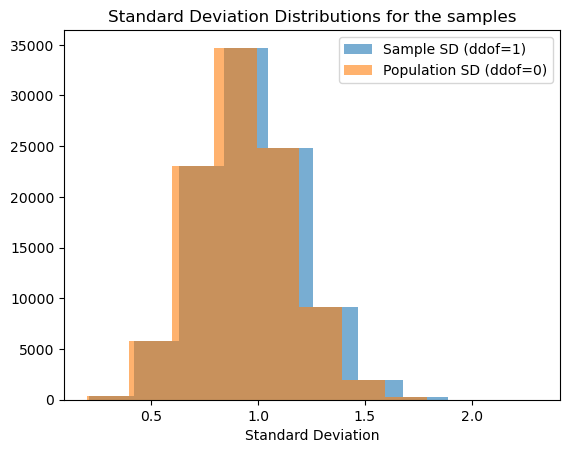

In [164]:
plt.hist(sd_sample, alpha=0.6, label='Sample SD (ddof=1)')
plt.hist(sd_population, alpha=0.6, label='Population SD (ddof=0)')
plt.legend()
plt.xlabel("Standard Deviation")
plt.title("Standard Deviation Distributions for the samples")
plt.show()


## Problem 3: t-Tests
A type II error occurs when a test fails to reject the null hypothesis even though it is false. For each mean difference 
d = 0, 0.1, 0.2, … , 1.0, repeat the following simulation 1,000 times:

1. Draw two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean 
d and standard deviation 1.
2. Run an independent samples t-test on the two samples, rejecting the null hypothesis if the p-value is less than 0.05.
3. Record the proportion of times the null hypothesis is not rejected.
Plot this proportion against d, and explain how the type II error rate changes as the difference in means increases.

## Problem 4: ANOVA
Generate three independent samples, each of size 30, from normal distributions with means 0, 0.5, and 1, each with standard deviation 1.

1. Perform a one-way ANOVA to test whether all three means are equal.
2. Perform three independent two-sample t-tests: samples 1 vs 2, 1 vs 3, and 2 vs 3.
3. Compare the conclusions.

Write a short note on why ANOVA is preferred over running several t-tests.

***
# End